# Jiaming Lin PS4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.  Are sons taller than fathers? Monte-Carlo approach

1. (3pt) load the fatherson.csv data. Perform basic description of it: what
is the number of observations? Are there any missings or otherwise
invalid entries?


In [2]:
fs = pd.read_csv("fatherson.csv.bz2", sep="\t")
print(fs.shape)
print(fs.head())
print(fs.isnull().sum())
# There are 1078 observations without missing values.

(1078, 2)
   fheight  sheight
0    165.2    151.8
1    160.7    160.6
2    165.0    160.9
3    167.0    159.5
4    155.3    163.3
fheight    0
sheight    0
dtype: int64


2. (3pt) Describe fathers and sons: compute the mean, median, standard
deviation, and range of their heights. According to these gures, who
are taller: fathers or sons? Compute the mean dierence between
fathers and sons. (The answer is 2.53cm.)

In [3]:
f_mean = fs.fheight.mean()
f_median = fs.fheight.median()
f_std = fs.fheight.std()
f_var = fs.fheight.var()
f_range = (fs.fheight.min(), fs.fheight.max())
s_mean = fs.sheight.mean()
s_median = fs.sheight.median()
s_std = fs.sheight.std()
s_var = fs.sheight.var()
s_range = (fs.sheight.min(), fs.sheight.max())

print("        mean                  median   standard deviation   variance              range")
print("father:",f_mean,"  ",f_median, "  ",f_std, "  ",f_var,"  ", f_range)
print("son   :",s_mean,"  ",s_median, "  ",s_std, "  ",s_var,"   ", s_range)
print(f_mean - s_mean)

# The mean difference between fathers and sons' height is 2.53cm and sons are taller.

        mean                  median   standard deviation   variance              range
father: 171.92523191094622    172.1    6.972345805242013    48.613606027875896    (149.9, 191.6)
son   : 174.45723562152145    174.3    7.150713294127493    51.13270061481166     (148.6, 199.0)
-2.532003710575225


3. (6pt) Lets add a graphical comparison. Plot histograms of both fathers'
and sons' heights. Comment the histograms/density plots. Which
distribution do they resemble?

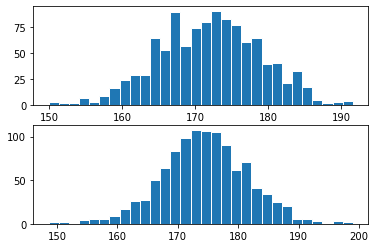

In [4]:
fig, ax = plt.subplots(2)
_ = ax[0].hist(fs.fheight, bins = 30, edgecolor = "white")
_ = ax[1].hist(fs.sheight, bins = 30, edgecolor = "white")

# The shape of both distributions seem normal

4. (6pt) Let's state our H0: fathers and sons are of similar height (in
average). Hence we have to create fake fathers and fake sons from a
similar distribution. An obvious choice for this is the distribution of
combined fathers' and sons' height.
Compute the overall mean µ and standard deviation σ of combined
fathers' and sons' heights.
Hint: you can use pd.concat to combine two series together into a
longer series.


In [5]:
combine = pd.concat([fs.fheight, fs.sheight])
print(combine.mean())
print(combine.std())

# The combined mean is 173.19 and combined standard deviation is 7.17

173.19123376623375
7.173110536219114


5. (6pt) Now create two sets of random normals, fake fathers and fake
sons, both with the same overall mean and overall standard deviation
that you just computed above.
What is the average fathers' and sons' dierence? Compare the result
with that you found in the previous problem.

In [6]:
np.random.seed(0)
f_father = np.random.normal(combine.mean(), combine.std(), 1078)
f_son = np.random.normal(combine.mean(), combine.std(), 1078)

print(f_father.mean() - f_son.mean())
# Average fathers' and sons' difference is 0.34cm, which is pretty smaller than 2.53cm in previous problem.

-0.34093468696872264


6. (6pt) Now repeat the previous question a large number R (1000 or
more) times. Each time store the mean dierence for fake fathers and
fake sons, so you end up with R dierent values for the mean dierence.

In [7]:
np.random.seed(0)
means = np.array([])

for i in range(1000):
    f_father = np.random.normal(combine.mean(), combine.std(), 1078)
    f_son = np.random.normal(combine.mean(), combine.std(), 1078)
    mean = f_father.mean() - f_son.mean()
    means = np.append(means, mean)

7. (6pt) What is the mean of the mean dierences? If you did your
simulations correctly, it should be close to 0. Explain why do you get
this result.

In [8]:
means.mean()
# The mean of mean difference is -0.008907190806883989
# This is because of central limit theorem. When we have sample means based on enough size of individuals , those means will form a 
# approximately normal distribution around mean close to the original mean which should be 0.

-0.008907190806883989

8. (9pt) What is the largest mean dierence (in absolute value) in your
sample?
Hint: np.abs computes absolute value.

In [9]:
np.max(np.abs(means))
# the largest mean difference in my sample is 1.2019711280406113

1.2019711280406113

9. (9pt) nd 95% condence interval (CI) of your sample of mean dierences. Does the dierence in actual data, 2.53cm in favor of sons, fall
into the CI?
Hint: use np.percentile(2.5) and a similar expression for the 97.5th
percentile.


In [10]:
np.percentile(means ,2.5), np.percentile(means ,97.5)
# The 95% confidence interval of my sample of mean differences is (-0.6212990943697718, 0.5460319310092201) and it does not include 2.53

(-0.6212990943697718, 0.5460319310092201)

10. (6pt) Finally, based on the simulations, what is your conclusion: is the
observed dierence 2.53 just a random uke, or are sons really taller
than fathers?


In [11]:
# My conclusion is that sons are really taller than fathers.

## 2 Now repeat the above with t-test

1. (8pt) Compute standard error SE of the dierence.


In [12]:
SE = ((f_std**2/1078)+(s_std**2/1078))**(0.5)
SE

0.304185866556143

2. (8pt) Compute 95% CI.
Use the 5% two-tail condence level to look up tcr values in t-distribution
table. OIS has such a table in Appendix C.2, and google can nd a
million of those.
95% CI is given by µ ± tcr · SE where µ is the mean, SE is its standard
error, and tcr is the critical value from the table.
Hint 1: what is the degrees of freedom in current case? Consult OIS
7.3.
Hint 2: we need 2-tailed test as sons can be both taller and shorter
than fathers.

In [29]:
# From table, the degree of freedom should be (n-1) + (n-1) which is 2(1078-1) which is 2154
# According to google, the t value should be 1.9611
diff = s_mean - f_mean
t = 1.9611
CI = (diff-t*SE, diff+t*SE)
CI

# The 95% CI is (1.935464807671973, 3.128542613478477)

(1.935464807671973, 3.128542613478477)

3. (6pt) What will you conclude based on CI: can you reject H0, fathers
and sons are of equal height, at 5% level?

In [14]:
# I can reject H0 at 5% level because my CI does not include 0, which means fathers and sons' heights are not equal at 5% level

4. (6pt) Now perform the opposite operation: compute the t-value. When
the you have mean µ and standard error SE, you can compute the tvalue by
t =
µ/
SE
Assume we do not have paired data here.
Hint: the answer should by quite large, > 8.

In [30]:
t_compute = diff/SE
t_compute

8.32387033375825

5. (6pt) What is the likelihood that such a t value happens just by random
chance? Consult the t-table.


In [16]:
# Less than 0.001

6. (6pt) Finally, state your conclusion: are fathers taller than sons? Do
all of your three methods: simulations, 95% CI, and t-value agree?


In [17]:
# No, all of methods state that sons are taller than fathers.

## 3 Extra credit challenge (10pt = 1 EC)

1. (3pt) First, time your simulations. Run a large number of simulations,
say 1M, and measure how long it takes on your computer. It should
take at least 5 seconds for your measurements to be precise enough.
Now you can easily calculate how long it would take to run 1012 or so
experiments.
Hint: check out %timeit magic macro.

In [18]:
def fun():
    for i in range(100000):
        f_father = np.random.normal(combine.mean(), combine.std(), 1078)
        f_son = np.random.normal(combine.mean(), combine.std(), 1078)
        mean = f_father.mean() - f_son.mean()

In [19]:
%timeit fun()
# Times take to run 10^6 iterations is 23.1s

23.1 s ± 1.32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
23.1*10**(6)
# Times take to run 10^12 iterations is 23100000s

23100000.0

2. (3pt) Second, what is the probability to receive such enormous tvalues? As these are o the t tables, you have to compute the corresponding probability yourself.
Assume we are dealing with normal distribution. (Not quite but we
are close.) You have to compute the probability you get a value larger
than the t value you computed. This can be done along the lines:

where you replace 1.96 with your actual t-value.
Explain: why does the example use norm.cdf(-1.96) instead of norm.cdf(1.96)?

In [25]:
from scipy import stats
norm = stats.norm()
p = norm.cdf(-t_compute)
print(p)

# The probability is 4.256836848516298e-17, use minus sign before the t is because it start from 0 and then we can get the probability 
# of t less than -t_compute directly.

4.256836848516298e-17


3. (2pt) How many iterations you need? Let's do a shortcutif probability
p is small, you need roughly 3/p iterations. So if p = 0.001, you need
3000 iterations.

In [26]:
num_it = 3/p
num_it

# I need 7.047486447702681e+16 iterations

7.047486447702681e+16

4. (2pt) Based on the timings you did above, how many years do you
have to run the simulations?
If one had started the computer the year your grandfather was born,
would it be there now?
If the rst Seattle inhabitants had started it when they moved here
following the melting ice, 10,000 or so years ago?
If the last dinosaurs had started it 66,000,000 years ago? (But it must
have been in Idaho or somewhere else, the land where Seattle is now
did not exist back then.)


In [28]:
years = ((num_it)*(23.1)/(10**6)) / (60*60*24*365)
years
# It will take 51622.57 years to get such t value, which is far longer than time since my grandfather was born and first Seattle 
# inhabitants when they moved here, but it is less than 66,000,000 years.

51622.57006022702